# Schiefer Wurf

"Der schiefe Wurf wird in nahezu jedem einführenden Physikbuch ausführlich diskutiert. Es handelt sich um eine gleichmäßig beschleunigte Bewegung mit einer gegebenen Anfangsgeschwindigkeit. Wenn man davon ausgeht, dass die Beschleunigung $\vec{a}$ konstant ist, dann kann man die \[Differentialgleichung $\vec{a} = \frac{\mathrm{d}v}{\mathrm{d}t}$\] \[$\dots$\] integrieren und erhält für die Geschwindigkeit $\vec{v}$ den Ausdruck
$$\vec{v}(t) = \vec{v}_0+\vec{a}t,$$
wobei $\vec{v}_0$ die Geschwindigkeit zum Zeitpunkt $t=0$ ist. Die nochmalige Integration von Gleichung (4.7) liefert dann direkt den Ortsvektor als Funktion der Zeit:
$$\vec{r}(t) = \vec{r}_0+\vec{v}_0\,t+\frac{1}{2}\,\vec{a}\,t^2$$
Für den schiefen Wurf \[$\dots$\] zeigt der Vektor der Beschleunigung in die -y-Richtung und hat den Betrag der Erdbeschleunigung:
$$\vec{a} = -g\vec{e}_y\quad\text{mit}\quad g = 9,81\frac{\mathrm{m}}{\mathrm{s^2}}$$
Den Zeitpunkt $t_e$, zu dem der Gegenstand auf dem Boden aufkommt, ergibt sich aus der Bedingung $y(t_e) = 0$. Diese liefert eine quadratische Gleichung, deren positive Lösung
$$t_e = \frac{v_{0,y}}{g} +\sqrt{\left(\frac{v_{0,y}}{g}\right)^2+\frac{2h}{g}}$$
lautet. Dabei bezeichnet $v_{0,y}$ die $y$-Komponente der Anfangsgeschwindigkeit. Wir wollen nun die Bahnkurve \[$\dots$\] im Zeitbereich von $t=0$ bis $t=t_e$ grafisch darstellen \[$\dots$\]."

In [5]:
"""Bahnkurve des schiefen Wurfs: Funktioniert so nicht! """

import math
import numpy as np
import matplotlib.pyplot as plt

h = 10.0                       # Anfangshöhe [m].
v_ab = 5.0                     # Abwurfgeschwindigkeit [m/s].
alpha_deg = 25.0               # Abwurfwinkel [°].
g = 9.81                       # Schwerebeschleunigung [m/s²].

# Rechne den Winkel in das Bogenmaß um.
alpha = math.radians(alpha_deg)

# Stelle die Vektoren als 1-dimensionale Arrays dar.
r0 = np.array([0, h])
v0 = np.array([v_ab * math.cos(alpha), v_ab * math.sin(alpha)])
a = np.array([0, -g])

# Berechne den Auftreffzeitpunkt auf dem Boden.
t_e = v0[1] / g + math.sqrt((v0[1] / g) ** 2 + 2 * r0[1] / g)

# Erezuge ein Array von Zeitpunkten.
t = np.linspace(0, t_e, 1000)

# Berechne den Ortsvektor für diese Zeitpunkte.
r = r0 + v0 * t + 0.5 * a * t**2

Führt man obigen Code aus, erhält man eine Fehlermeldung: einen ValueError, da die Arrays der Dimensionen 2x1 und 1000x1 nicht multipliziert werden können. Python kennt schlicht keine arithmetischen Vorschriften, um Arrays unterschiedlicher Größe miteinander zu multiplizieren.

Die Lösung? Man könnte jedes Element des Ortsvektors einzeln berechnen (for-Schleife), oder das Paket "NumPy" verwenden, in dem das Broadcasten von Arrays unterschiedlicher Größe analog zur Multiplikation von Zeilen und Spaltenvektoren möglich ist.

Fangen wir mit der for-Schleife an. Kommentiere die Zeile mit der Berechnung im obigen Block aus, und versuche den folgenden Code zu vervollständigen:

In [6]:
# Berechne den Ortsvektor für alle Zeitpunkte im Array t.
r = np.empty((t.size, r0.size))
for i in range(t.size):
    for j in range(r0.size):
        # ...
        # Hier soll die Berechnung von r stehen

Leider ist dieser Code nicht ganz effizient. Man verwechselt leicht die Indizes, die Berechnung ist unübersichtlich und for-Schleifen sind in Python recht langsam, da bei jedem Durchlauf die Laufindizes $i$ und $j$ zwischengespeichert und erhöht werden müssen.

Deshalb soll nun eine "NumPy"-Lösung her. Alle Arrays, $t$, $r_0$, $v_0$ und $a$, liegen bereits als "NumPy"-Arrays vor. Wie könnten sie sich verrechnen lassen? Hinweis: Die "NumPy"-Funktion .reshape($\dots$) könnte hilfreich sein.

In [8]:
# ... ?

# Berechne den Ortsvektor für alle Zeitpunkte im Array t.
r = # ?

Zur Anzeige der Daten dient das Paket Matplotlib:

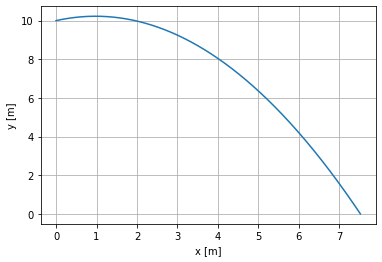

In [9]:
# Erzeuge eine Figure und ein Axes-Objekt.
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.set_xlabel('x [m]')
ax.set_ylabel('y [m]')
ax.grid()

# Plotte die Bahnkurve.
# ax.plot(...) ?

# Zeige die Grafik an.
plt.show()

Quelle für Text und Code: Natt, Oliver (2020). Physik mit Python: Simulationen, Visualisierungen und Animationen von Anfang an (1st ed. 2020) Springer.